## [Loading libraries]()<a id="1"></a> <br>


In [1]:


import numpy as np 
import pandas as pd
import os
import seaborn as sns
print(os.listdir("../input"))
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
from wordcloud import WordCloud
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium
from tqdm import tqdm
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from gensim.models import word2vec
import nltk
# Any results you write to the current directory are saved as output.

['zomato.csv']


Using TensorFlow backend.


In [2]:
df=pd.read_csv("../input/zomato.csv")

## [Getting Basic Ideas]()<a id="2"></a> <br>


In [3]:
print("dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

dataset contains 51717 rows and 17 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [5]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

**Columns description**

- **url**
contains the url of the restaurant in the zomato website

- **address**
contains the address of the restaurant in Bengaluru

- **name**
contains the name of the restaurant

- **online_order**
whether online ordering is available in the restaurant or not

- **book_table**
table book option available or not

- **rate**
contains the overall rating of the restaurant out of 5

- **votes**
contains total number of rating for the restaurant as of the above mentioned date

- **phone**
contains the phone number of the restaurant

- **location**
contains the neighborhood in which the restaurant is located

- **rest_type**
restaurant type

- **dish_liked**
dishes people liked in the restaurant

- **cuisines**
food styles, separated by comma

- **approx_cost(for two people)**
contains the approximate cost for meal for two people

- **reviews_list**
list of tuples containing reviews for the restaurant, each tuple 

- **menu_item**
contains list of menus available in the restaurant

- **listed_in(type)**
type of meal

- **listed_in(city)**
contains the neighborhood in which the restaurant is listed


## [Exploratory data analysis](#3)

## [Which are the top restaurant chains in Bangaluru?]()<a id="4"></a> <br>


Text(0.5, 0, 'Number of outlets')

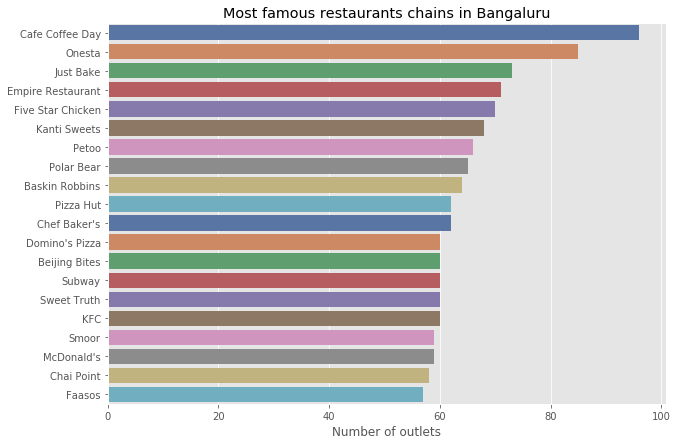

In [6]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

- As you can see **Cafe coffee day,Onesta,Just Bake** has the most number of outlets in and around bangalore.
- This is rather interesting,we will inspect each of them later.

## [How many of the restuarants do not accept online orders?]()<a id="5"></a> <br>


In [7]:
x=df['online_order'].value_counts()
colors = ['#FEBFB3', '#E1396C']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout=go.Layout(title="Accepting vs not accepting online orders",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')
    
    
    

1. As clearly indicated,almost 60 per cent of restaurants in Banglore accepts online orders.
2. Nearly 40 per cent of the restaurants do not accept online orders.
3. This might be because of the fact that these restaurants cannot afford to pay commission to zomoto for giving them orders online.
   zomato may want to consider giving them some more benefits if they want to increse the number of restaurants serving their customers online.


## [What is the ratio b/w restaurants that provide and do not provide table booking ?]()<a id="25"></a> <br>



In [8]:
x=df['book_table'].value_counts()
colors = ['#96D38C', '#D0F9B1']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
layout=go.Layout(title="Table booking",width=500,height=500)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')
    

1. Almost 90 percent of restaurants in Banglore do not provide table booking facility.
2. In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.
3. We will inspect this further.

## [Rating distribution]()<a id="6"></a> <br>


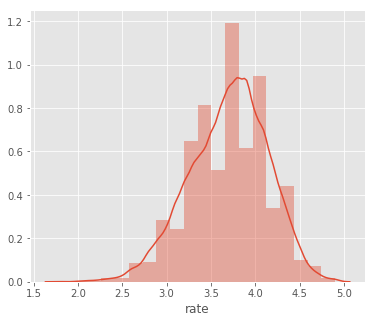

In [9]:
plt.figure(figsize=(6,5))
rating=df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)

1. Almost more than 50 percent of restaurants has rating between 3 and 4.
2. Restaurants having rating more than 4.5 are very rare.

In [10]:

cost_dist=df[['rate','approx_cost(for two people)','online_order']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))


## [Cost vs rating]()

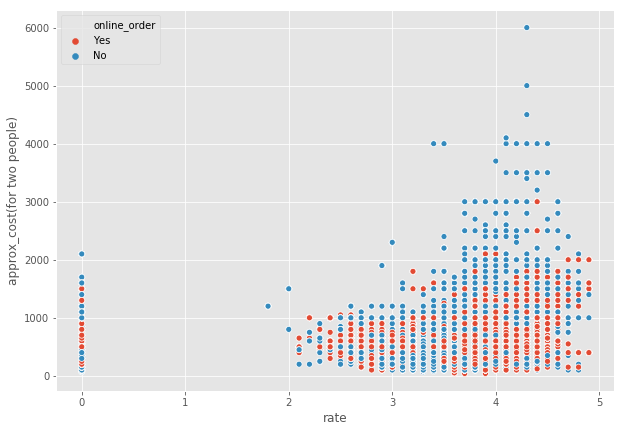

In [11]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='approx_cost(for two people)',hue='online_order',data=cost_dist)
plt.show()

- 

### [Distribution of cost for two people]()

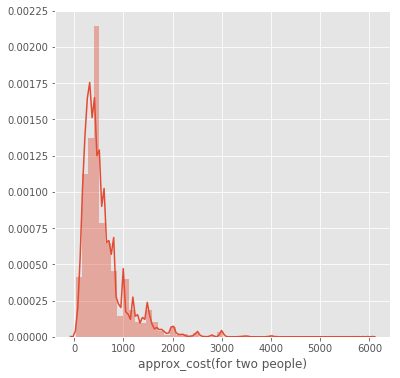

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(cost_dist['approx_cost(for two people)'])
plt.show()

- We can see that the distribution if left skewed.
- This means almost 90percent of restaurants serve food for budget less than 1000 INR.($15)

## [Is there any difference b/w votes of restaurants accepting and not accepting online orders?]()<a id="7"></a> <br>


In [13]:


votes_yes=df[df['online_order']=="Yes"]['votes']
trace0=go.Box(y=votes_yes,name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))

votes_no=df[df['online_order']=="No"]['votes']
trace1=go.Box(y=votes_no,name="Not accepting online orders",
              marker = dict(
        color = 'rgb(0, 128, 128)',
    ))

layout = go.Layout(
    title = "Box Plots of votes",width=800,height=500
)

data=[trace0,trace1]
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)




1. Yes,you can observe that median number of votes for both categories vary.
2. Restaurants accepting online orders tend to get more votes from customers as there is a rating option poping up after each order through zomato application.

## [Which are the most common restaurant type in Banglore?]()<a id="8"></a> <br>


Text(0.5, 0, 'count')

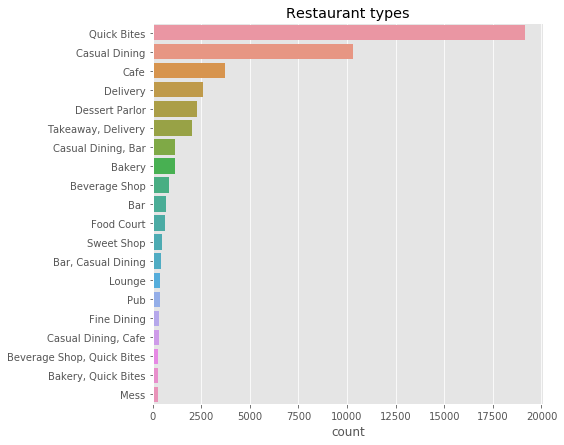

In [14]:
plt.figure(figsize=(7,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

1. No doubt about this as Banglore is known as the tech capital of India,people having busy and modern life will prefer Quick Bites.
2. We can observe tha Quick Bites type restaurants dominates.

## [Cost factor ?]()<a id="9"></a> <br>


In [15]:
trace0=go.Box(y=df['approx_cost(for two people)'],name="accepting online orders",
              marker = dict(
        color = 'rgb(214, 12, 140)',
    ))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=800,height=500,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)

1. The median approximate cost for two people is 400 for a single meal.
2. 50 percent of restaurants charge between 300 and 650 for single meal for two people.


### [Finding Best budget Restaurants in any location]()

- I have implemented a simple filtering mechanism to find best budget restaurants in any locations in Bangalore.
- You can pass location and restaurant type as parameteres,function will return name of restaurants.


In [16]:
cost_dist=df[['rate','approx_cost(for two people)','location','name','rest_type']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

In [17]:
def return_budget(location,rest):
    budget=cost_dist[(cost_dist['approx_cost(for two people)']<=400) & (cost_dist['location']==location) & 
                     (cost_dist['rate']>4) & (cost_dist['rest_type']==rest)]
    return(budget['name'].unique())

In [18]:
return_budget('BTM',"Quick Bites")

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

## [Which are the foodie areas?]()<a id="10"></a> <br>


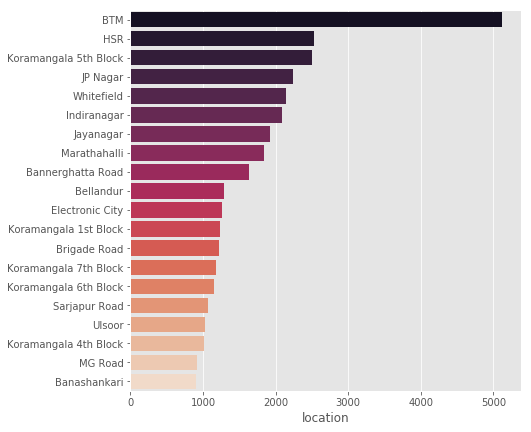

In [19]:
plt.figure(figsize=(7,7))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

1. We can see that **BTM,HSR and Koranmangala 5th block** has the most number of restaurants.
2. BTM dominates the section by having more than 5000 restaurants.

## [Which are the most common cuisines in each locations?]()<a id="11"></a> <br>


In [20]:
df_1=df.groupby(['location','cuisines']).agg('count')
data=df_1.sort_values(['url'],ascending=False).groupby(['location'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})


In [21]:

data.head(10)

level_0           location               cuisines  count
0        0                BTM  North Indian, Chinese    379
1        0                BTM           North Indian    340
2        0                BTM                Biryani    120
3        1       Banashankari           South Indian     86
4        1       Banashankari  North Indian, Chinese     61
5        1       Banashankari           North Indian     36
6        2          Banaswadi           South Indian     37
7        2          Banaswadi  North Indian, Chinese     24
8        2          Banaswadi                Biryani     23
9        3  Bannerghatta Road  North Indian, Chinese    130

## [Extracting location information using Geopy]()<a id="12"></a> <br>


In [22]:
locations=pd.DataFrame({"Name":df['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon
locations.to_csv('locations.csv',index=False)

In [23]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

Name                         geo_loc
0        Banashankari         (12.9152208, 77.573598)
1        Basavanagudi        (12.9417261, 77.5755021)
2         Mysore Road        (12.9314092, 77.5067138)
3           Jayanagar        (12.9292731, 77.5824229)
4  Kumaraswamy Layout  (12.9068169, 77.5635247362134)

- We have found out latitude and longitude of each location listed in the dataset using geopy.
- This is used to plot maps.

## [Heatmap of restaurant count on each location]()<a id="13"></a> <br>


In [24]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

5124

In [25]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [26]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [27]:
basemap

1. It is clear that restaurants tend to concentrate in central bangalore area.
2. The clutter of restaurants lowers are we move away from central.
3. So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.

## [Which are  the most popular cuisines of Bangalore?]()<a id="14"></a> <br>


Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

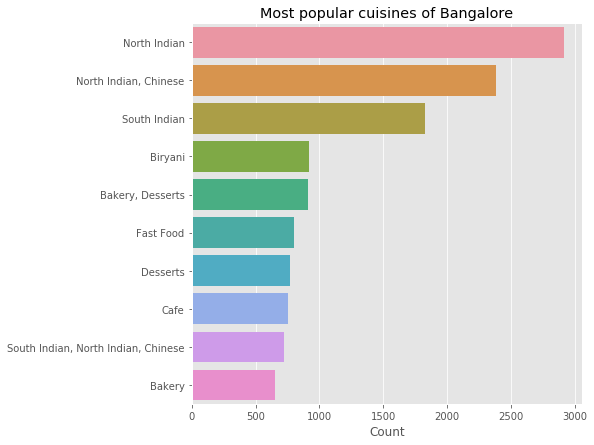

In [28]:
plt.figure(figsize=(7,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

1. We can observe that **North Indian,chinese,South Indian and Biriyani** are most common.
2. Is this imply the fact that Banglore is more influenced by North Indian culture more than South?
- We will inspect further......

## [Heatmap of North Indian restaurants]()<a id="15"></a> <br>


In [29]:
def produce_data(col,name):
    data= pd.DataFrame(df[df[col]==name].groupby(['location'],as_index=False)['url'].agg('count'))
    data.columns=['Name','count']
    print(data.head())
    data=data.merge(locations,on="Name",how='left').dropna()
    data['lan'],data['lon']=zip(*data['geo_loc'].values)
    return data.drop(['geo_loc'],axis=1)



In [30]:
North_India=produce_data('cuisines','North Indian')

                Name  count
0                BTM    340
1       Banashankari     36
2          Banaswadi     12
3  Bannerghatta Road     75
4       Basavanagudi     21


In [31]:
basemap=generateBaseMap()
HeatMap(North_India[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

1. Interesting to see a cluster of North Indian Restaurants in South Bangalore area !
2. This may indicate that these areas are more populated by North Indians.

## [What about South  Indian cuisines?]()<a id="16"></a> <br>


In [32]:
food=produce_data('cuisines','South Indian')
basemap=generateBaseMap()
HeatMap(food[['lan','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

                Name  count
0                BTM    113
1       Banashankari     86
2          Banaswadi     37
3  Bannerghatta Road     48
4       Basavanagudi     89


1. They tend to span all over Bangalore.
2. South Indian cuisines tend to cluster near central Bangalore.

## [Analysing Restaurant chains]()<a id="17"></a> <br>
 

In [33]:
def produce_chains(name):
    data_chain=pd.DataFrame(df[df["name"]==name]['location'].value_counts().reset_index())
    data_chain.columns=['Name','count']
    data_chain=data_chain.merge(locations,on="Name",how="left").dropna()
    data_chain['lan'],data_chain['lon']=zip(*data_chain['geo_loc'].values)
    return data_chain[['Name','count','lan','lon']]


In [34]:
df_1=df.groupby(['rest_type','name']).agg('count')
datas=df_1.sort_values(['url'],ascending=False).groupby(['rest_type'],
                as_index=False).apply(lambda x : x.sort_values(by="url",ascending=False).head(3))['url'].reset_index().rename(columns={'url':'count'})


In [35]:
mapbox_access_token="pk.eyJ1Ijoic2hhaHVsZXMiLCJhIjoiY2p4ZTE5NGloMDc2YjNyczBhcDBnZnA5aCJ9.psBECQ2nub0o25PgHcU88w"


## [Which are the most popular casual dining restaurant chains?]()<a id="18"></a> <br>


In [36]:
casual=datas[datas['rest_type']=='Casual Dining']
casual

level_0      rest_type                name  count
59       27  Casual Dining   Empire Restaurant     58
60       27  Casual Dining       Beijing Bites     48
61       27  Casual Dining  Mani's Dum Biryani     47

- We can see tht **Empire restaurant,Beijing bites and Mani's dum biriyani** are the most popular casual dining restaurant chains in Bangalore.
- We will inspect them further...

## [Where are their outlets located?]()<a id="19"></a> <br>


In [37]:
def produce_trace(data_chain,name):
        data_chain['text']=data_chain['Name']+'<br>'+data_chain['count'].astype(str)
        trace =  go.Scattermapbox(
           
                lat=data_chain['lan'],
                lon=data_chain['lon'],
                mode='markers',
                marker=go.scattermapbox.Marker(
                    size=data_chain['count']*4
                ),
                text=data_chain['text'],name=name
            )
        
        return trace

In [38]:

data=[] 
for row in casual['name']:
    data_chain=produce_chains(row) 
    trace_0=produce_trace(data_chain,row)
    data.append(trace_0)



layout = go.Layout(title="Casual Dining Restaurant chains locations around Banglore",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,style="streets",
        center=dict(
            lat=12.96,
            lon=77.59
        ),
        pitch=0,
        zoom=10
    ),
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

1. We can see that **Mani's dum biriyani** restaurant has half of their restaurants in central Banglore.
2. ** Empire Restaurant** is present in all over Banglore.
3. **Mani's dum Biriyani** has 12 outlets in ulsoor,which is the most in a single location.

## [Top quick bites restaurant chains in Banglore]()<a id="20"></a> <br>


In [39]:
quick=datas[datas['rest_type']=='Quick Bites']
quick 

level_0    rest_type               name  count
179       78  Quick Bites  Five Star Chicken     69
180       78  Quick Bites     Domino's Pizza     60
181       78  Quick Bites         McDonald's     59

- Surprisingly  ** Five star chicken** dominates in quick bites restaurant types overtaking famous **Domino's Pizza and McDonald's**.
- Five Star Chicken is a branch of Charoen Pokphand Group Foods, a Thai multinational conglomerate with over $12 billion business in Agro and Food       Industries. Five Star Chicken specialties in fried chicken.

## [Where are their outlets located?]()<a id="21"></a> <br>


In [40]:
data=[]  
for row in quick['name']:
    data_chain=produce_chains(row) 
    trace_0=produce_trace(data_chain,row)
    data.append(trace_0)



layout = go.Layout(title="Quick Bites Restaurant chains locations around Banglore",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,style="streets",
        center=dict(
            lat=12.96,
            lon=77.59
        ),
        pitch=0,
        zoom=10
    ),
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

## [Top Cafes of Banglore?]()<a id="22"></a> <br>


In [41]:
cafe=datas[datas['rest_type']=='Cafe']
cafe

level_0 rest_type                 name  count
41       19      Cafe      Cafe Coffee Day     96
42       19      Cafe  Smally's Resto Cafe     54
43       19      Cafe         Mudpipe Cafe     39

- No surprises,Cafe coffee day restaurant dominated way over other cafe chains in Banglore.
- Cafe coffee day has 96 outlets in Banglore.
- Café Coffee Day was started as a retail restaurant in 1996. The first CCD outlet was set up on July 11, 1996, at Brigade Road, Bengaluru, Karnataka.


## [Where are their outlets located?]()<a id="23"></a> <br>


In [42]:
data=[]  
for row in cafe['name']:
    data_chain=produce_chains(row) 
    trace_0=produce_trace(data_chain,row)
    data.append(trace_0)



layout = go.Layout(title="Cafe Restaurant chains locations around Banglore",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,style="streets",
        center=dict(
            lat=12.96,
            lon=77.59
        ),
        pitch=0,
        zoom=10
    ),
)


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Montreal Mapbox')

## [Wordcloud of dishes liked by cuisines.]()<a id="24"></a> <br>


In [43]:
df['dish_liked']=df['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
#x=df.groupby('rest_type',as_index=False)['dish_liked'].agg('sum')
#x['dish_liked']=x['dish_liked'].apply(lambda x : list(filter(lambda a : a!='',x)))

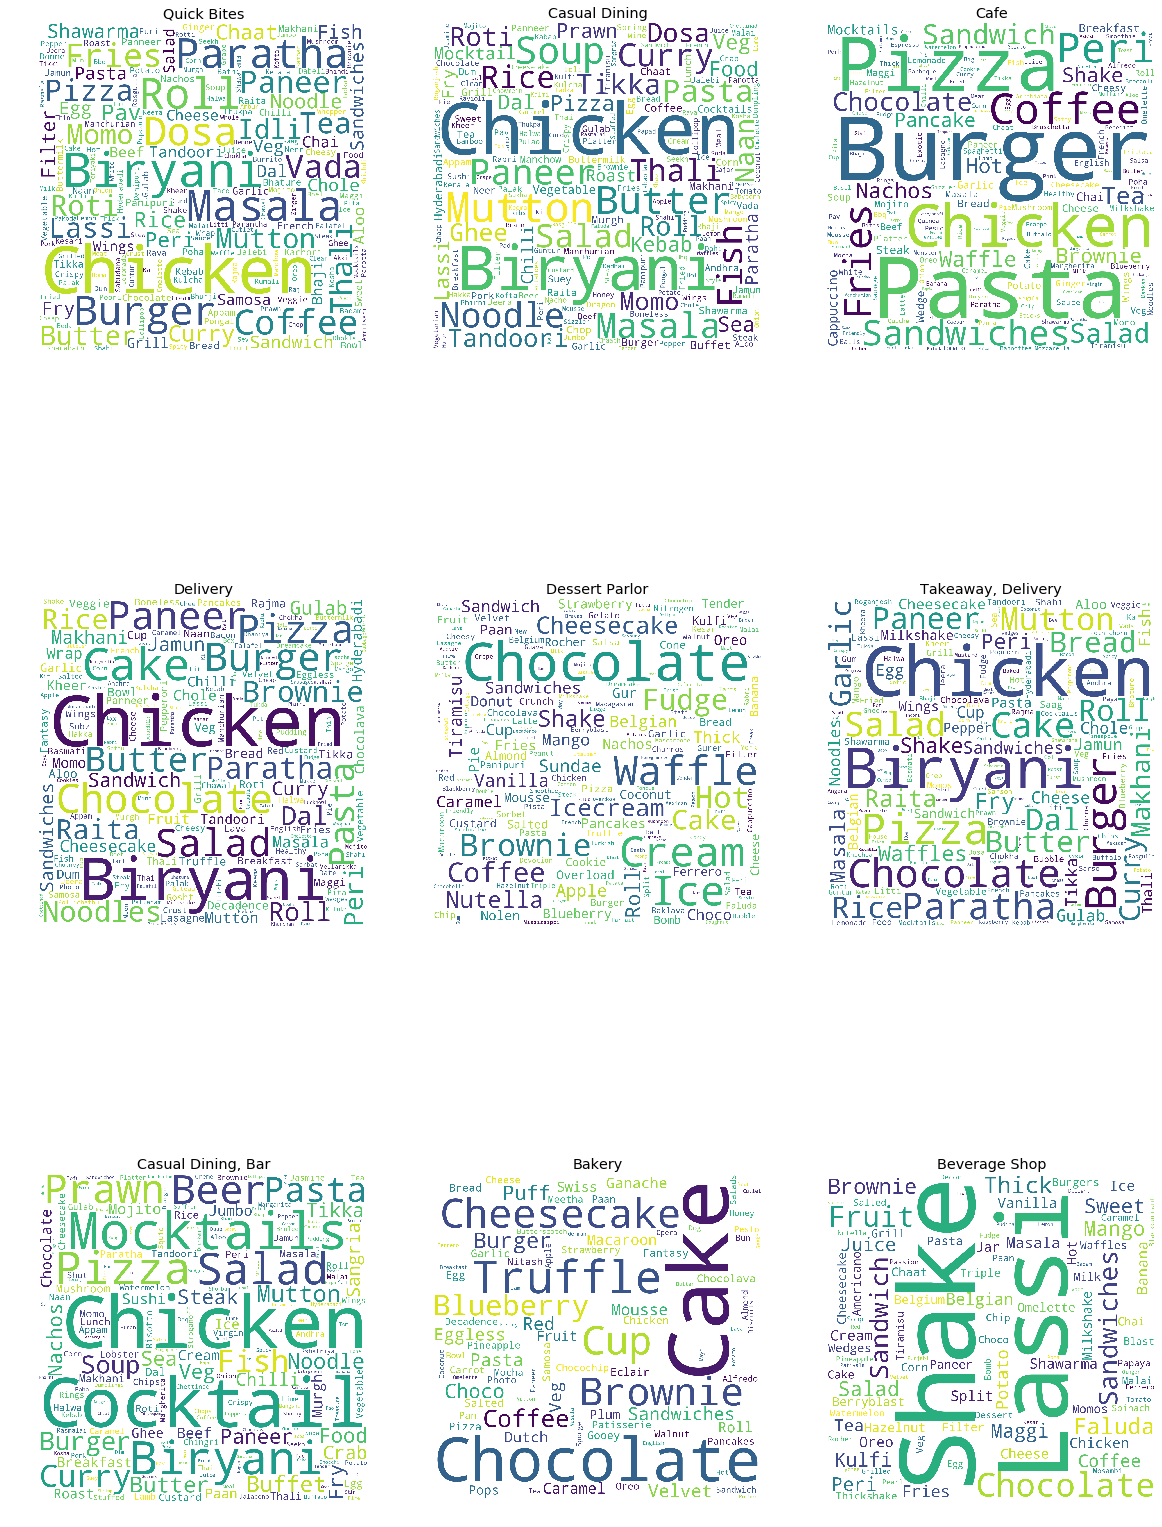

In [44]:
rest=df['rest_type'].value_counts()[:9].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=df[df['rest_type']==r]['dish_liked'].values.tolist()
        corpus=','.join(x  for list_words in corpus for x in list_words)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        

        
        
produce_wordcloud(rest)

## [Analysing Reviews]()<a id="26"></a><br>

- In this section we will go on to prepare reviews dataframe.
- We will extract reviews and ratings of each restaurant and create a dataframe with it.


In [45]:
all_ratings = []

for name,ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

51717it [00:22, 2275.82it/s]


In [46]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [47]:
rating_df.to_csv("Ratings.csv")

In [48]:
rating_df.head()

name  rating                                             review
0  Jalsa     4.0  A beautiful place to dine inThe interiors take...
1  Jalsa     4.0  I was here for dinner with my family on a week...
2  Jalsa     2.0  Its a restaurant near to Banashankari BDA Me a...
3  Jalsa     4.0  We went here on a weekend and one of us had th...
4  Jalsa     5.0  The best thing about the place is its ambiance...

## [WordCloud of Reviews of restaurant chains]()<a id="27"></a><br>

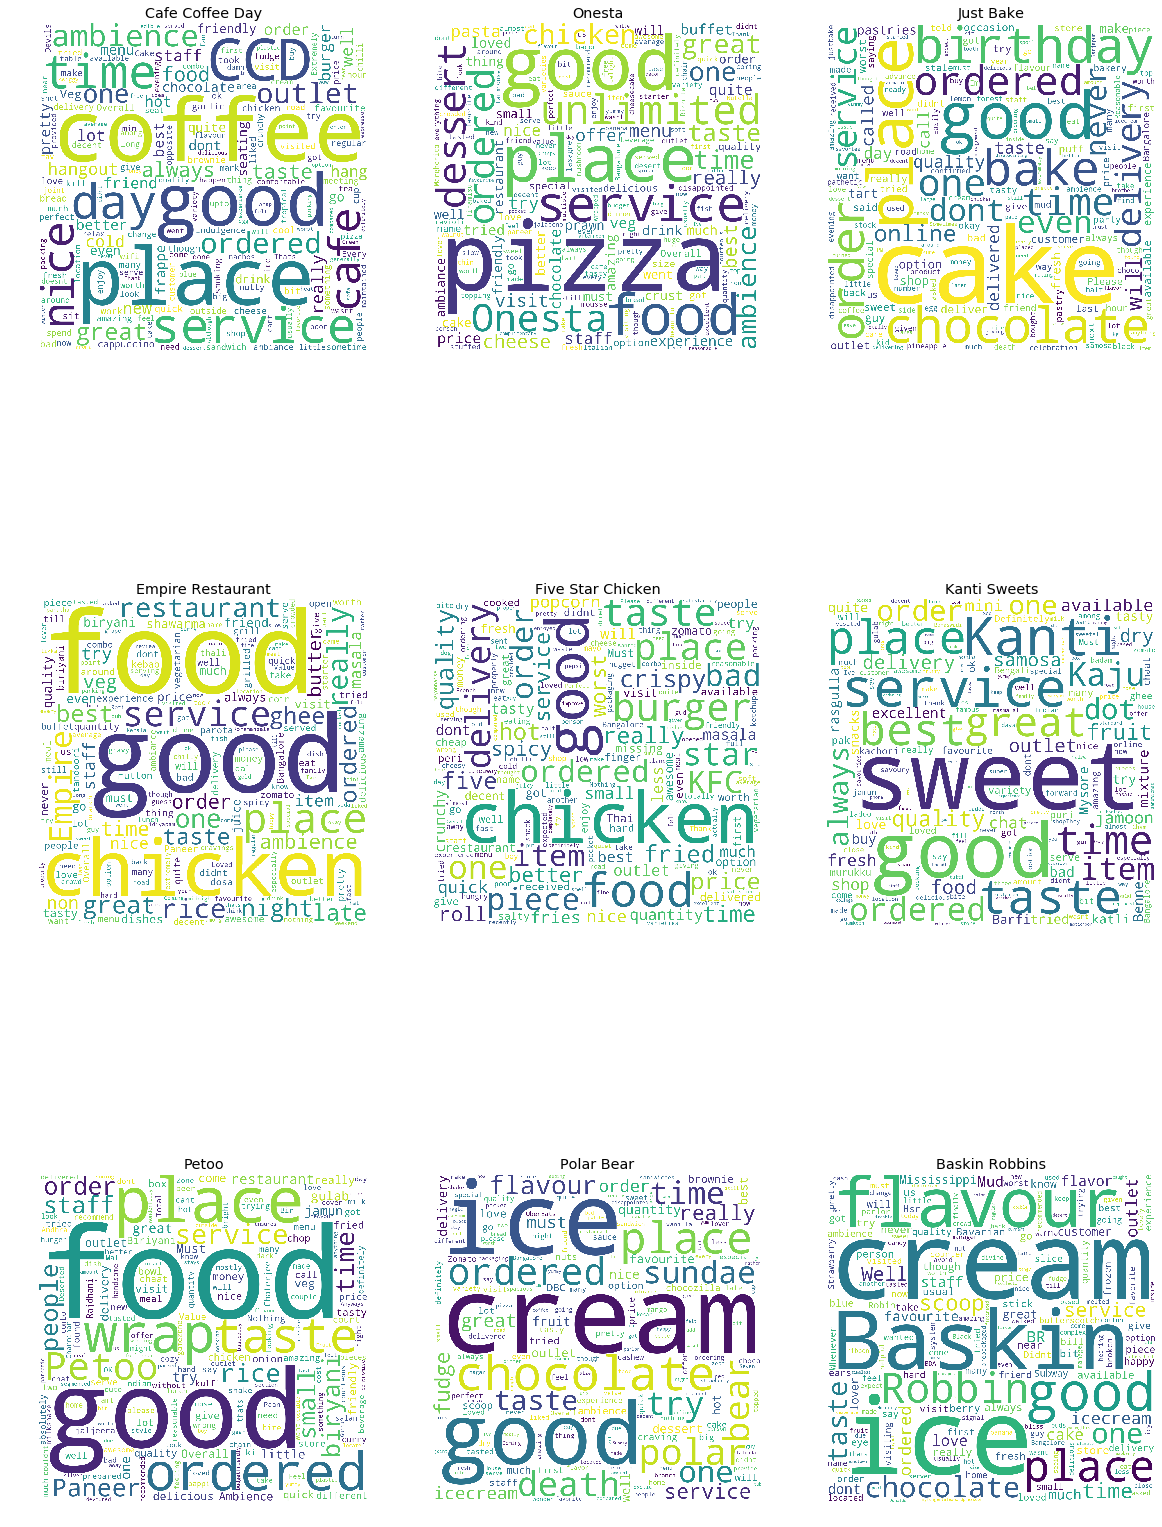

In [49]:
rest=df['name'].value_counts()[:9].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=rating_df[rating_df['name']==r]['review'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        

        
        
produce_wordcloud(rest)

## [Rating distribution]()<a id="28" ></a><br>

Text(0, 0.5, 'count')

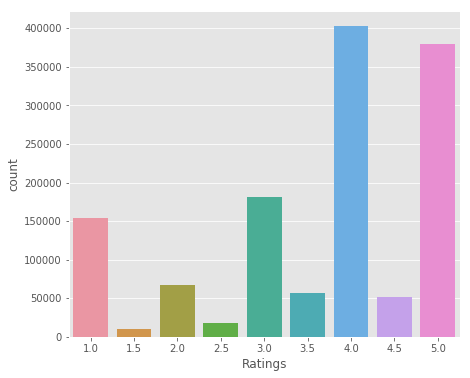

In [50]:
plt.figure(figsize=(7,6))
rating=rating_df['rating'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

## [Topic modelling]()<a id="33" ></a><br>

We will do topic modelling for postive and negative comments seperately to understand the different between the two types.

##  [Topic modeling for positive comments]()<a id="34" ></a><br>

- As the first step we will divide comments as negative and positive on the basis on rating provided.
- Comments with rating below 2.5 is classified as negative and greater tham 2.5 as classified as positive.

In [51]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)


Now,
   - we will remove stopwords
   - Lemmatize each word
   - Create corpus
   - Tokenize them

In [52]:
stops=stopwords.words('english')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==1]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)


> Now we will  use **Termfrequency Inverse doc frequency(Tfidf)** to vectorize the tokens.

In [53]:

vect=TfidfVectorizer()
vect_fit=vect.fit(tokens)
    

**Latent Dirichlet allocation**

In [54]:
id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vectorized_data=vect_fit.transform(tokens)
gensim_corpus=gensim.matutils.Sparse2Corpus(vectorized_data,documents_columns=False)
ldamodel = gensim.models.ldamodel.LdaModel(gensim_corpus,id2word=id_map,num_topics=5,random_state=34,passes=25)


## [Visualizing output]()<a id="28" ></a><br>

**Word Counts of Topic Keywords**

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

In [55]:
counter=Counter(corpus)

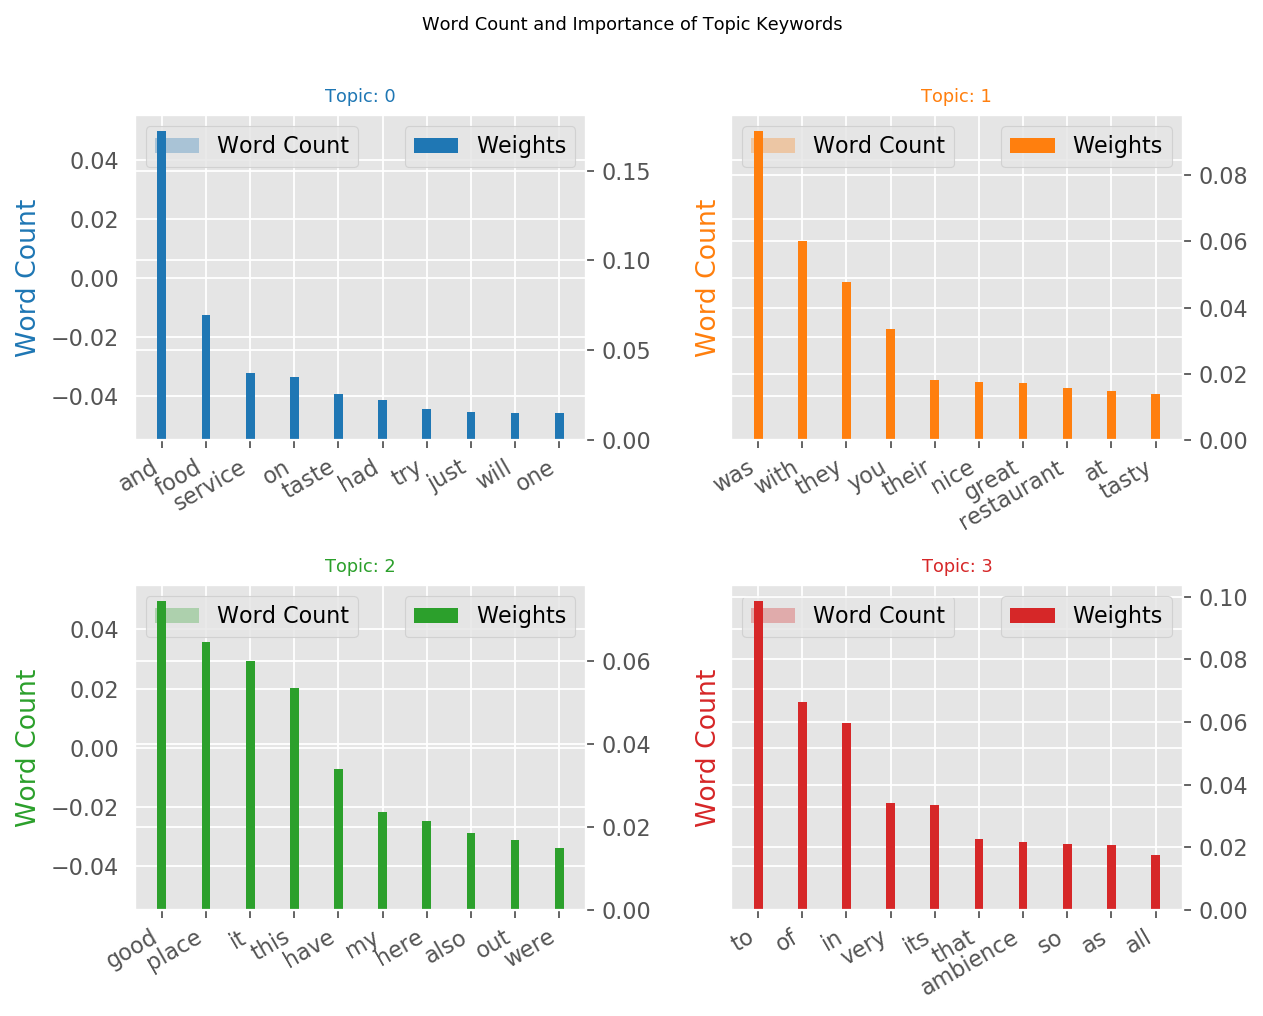

In [56]:
out=[]
topics=ldamodel.show_topics(formatted=False)
for i,topic in topics:
    for word,weight in topic:
        out.append([word,i,weight,counter[word]])

dataframe = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.3, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataframe.loc[dataframe.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=8, y=1.05)    
plt.show()

## [Topic modeling for negative comments]()<a id="35" ></a><br>

In [57]:
stops=stopwords.words('english')
lem=WordNetLemmatizer()
corpus=' '.join(lem.lemmatize(x) for x in rating_df[rating_df['sent']==0]['review'][:3000] if x not in stops)
tokens=word_tokenize(corpus)

In [58]:
vect=TfidfVectorizer()
vect_fit=vect.fit(tokens)
id_map=dict((v,k) for k,v in vect.vocabulary_.items())
vectorized_data=vect_fit.transform(tokens)
gensim_corpus=gensim.matutils.Sparse2Corpus(vectorized_data,documents_columns=False)
ldamodel = gensim.models.ldamodel.LdaModel(gensim_corpus,id2word=id_map,num_topics=5,random_state=34,passes=25)

 

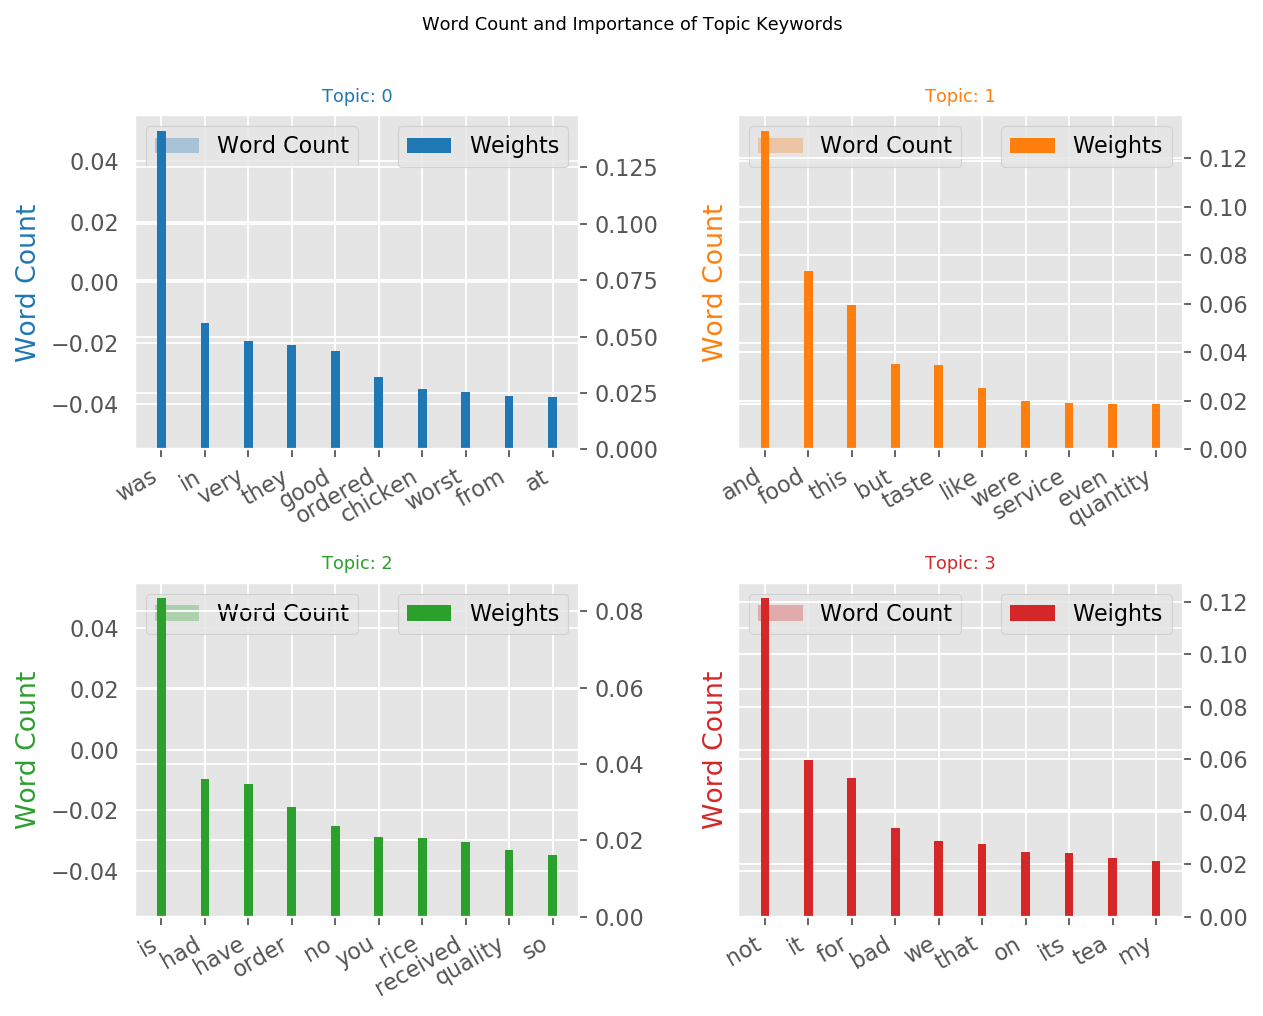

In [59]:
counter=Counter(corpus)
out=[]
topics=ldamodel.show_topics(formatted=False)
for i,topic in topics:
    for word,weight in topic:
        out.append([word,i,weight,counter[word]])

dataframe = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(8,6), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.3, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=dataframe.loc[dataframe.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    #ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=8)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(dataframe.loc[dataframe.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=8, y=1.05)    
plt.show()

- We can clearly observe the difference between the two types of comments
- The words used are clearly distinguishable.
- The words used in negative comments are clearly critisizing.
- The word used in positive comments  are clearly appreciating.

### T-SNE of Reviews 

(t-SNE) t-Distributed Stochastic Neighbor Embedding is a non-linear dimensionality reduction algorithm used for exploring high-dimensional data. It maps multi-dimensional data to two or more dimensions suitable for human observation. With help of the t-SNE algorithms, you may have to plot fewer exploratory data analysis plots next time you work with high dimensional data.
![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/01/19100947/20131959678_bf1a8e3fcc_b-768x798.jpg)

In this section we will visualize words used in reviews in a 2 dimensional space.
- For that we will first lemmatize and tokenize each reviews and build a corpus out of it.

In [60]:
stops=set(stopwords.words('english'))
lem=WordNetLemmatizer()
corpus=[]
for review in tqdm(rating_df['review'][:10000]):
    words=[]
    for x in word_tokenize(review):
        x=lem.lemmatize(x.lower())
        if x not in stops:
            words.append(x)
            
    corpus.append(words)

100%|██████████| 10000/10000 [00:06<00:00, 1584.88it/s]


Now we will use word2vec to represent each word as a vector.

In [61]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=200, workers=4)

In [62]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



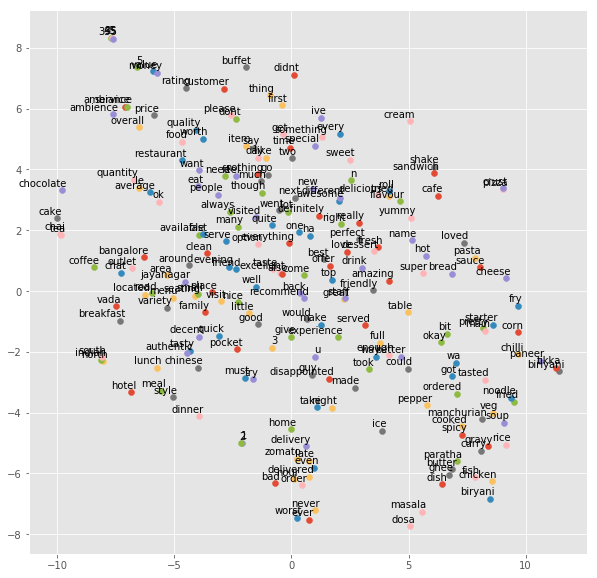

In [63]:
tsne_plot(model)

### T-SNE of adjectivs used in postive reviews

In [64]:
postive=rating_df[rating_df['rating']>3]['review'][:2000]
negative=rating_df[rating_df['rating']<2.5]['review'][:2000]

def return_corpus(df):
    corpus=[]
    for review in df:
        tagged=nltk.pos_tag(word_tokenize(review))
        adj=[]
        for x in tagged:
            if x[1]=='JJ':
                adj.append(x[0])
        corpus.append(adj)
    return corpus

Wow,we can observe all the adjective used in the postive reviews represented in the 2D space.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



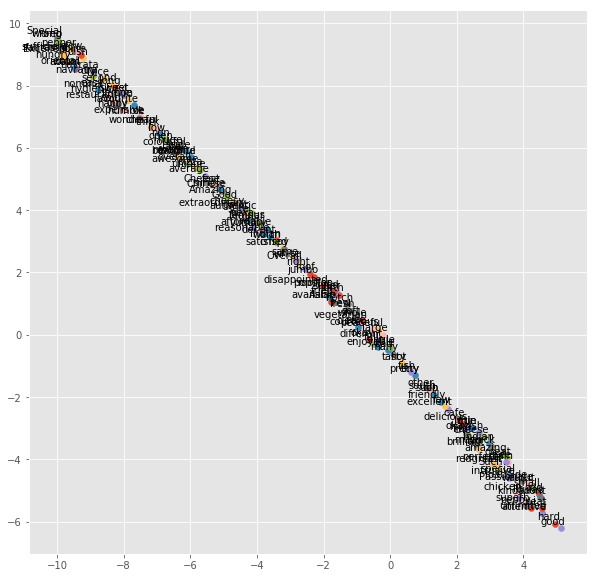

In [65]:
corpus=return_corpus(postive)
model = word2vec.Word2Vec(corpus, size=100, min_count=10,window=20, workers=4)
tsne_plot(model)

### T-SNE of adjectives used in Negative reviews

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



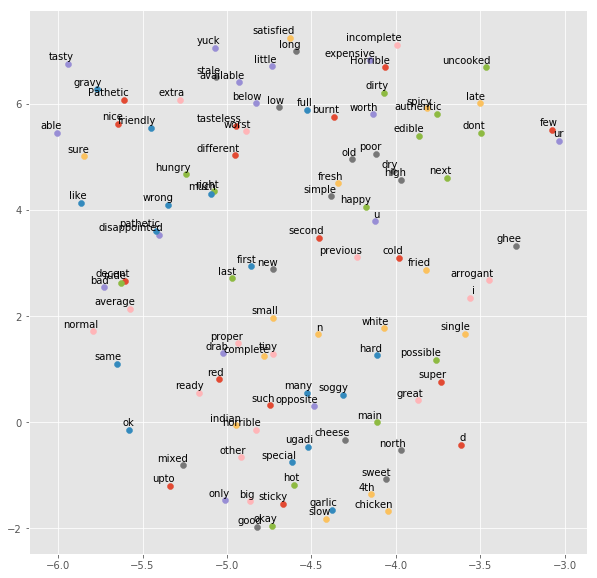

In [66]:
corpus=return_corpus(negative)
model = word2vec.Word2Vec(corpus, size=100, min_count=10,window=20, workers=4)
tsne_plot(model)

## [Sentimental Analysis]()<a id="29" ></a><br>

Sentiment Analysis is the process of computationally determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.



![](https://www.geeksforgeeks.org/wp-content/uploads/Twitter-Sentiment-Analysis-using-Python.jpg)

## [Data preparation]()<a id="30" ></a><br>


For doing sentimental analysis on reviews provided bt users.We have to prepare our data in appropriate format.
We will map reviews to positive and negative on the basis of the ratings provided by each user.So,we will map reviews to negative if the rating given is less than 2.5 and positive if rating is greater than 2.5 


In [67]:
rating_df['sent']=rating_df['rating'].apply(lambda x: 1 if int(x)>2.5 else 0)

- Next, we will tokenize the data and vectorize the reviews to feed it to our model.


In [68]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(rating_df['review'].values)
X = tokenizer.texts_to_sequences(rating_df['review'].values)
X = pad_sequences(X)


## [Building our model]()<a id="31" ></a><br>

In [69]:
embed_dim = 32
lstm_out = 32

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
#model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 194, 32)           96000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 104,386
Trainable params: 104,386
Non-trainable params: 0
_________________________________________________________________
None


#### Train and test split

- We will now encode our target variable. **pd.get_dummies** is used for on-hot encoding.
- 33 percent of data is reserved for testing our model

In [70]:
Y = pd.get_dummies(rating_df['sent'].astype(int)).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)



(884378, 194) (884378, 2)
(435590, 194) (435590, 2)


In [71]:
batch_size = 3200
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size)


Epoch 1/5
884378/884378 [==============================] - 60s 68us/step - loss: 0.2665 - accuracy: 0.8952
Epoch 2/5
884378/884378 [==============================] - 61s 69us/step - loss: 0.1551 - accuracy: 0.9404
Epoch 3/5
884378/884378 [==============================] - 59s 67us/step - loss: 0.1388 - accuracy: 0.9475
Epoch 4/5
884378/884378 [==============================] - 59s 67us/step - loss: 0.1278 - accuracy: 0.9521
Epoch 5/5
884378/884378 [==============================] - 59s 67us/step - loss: 0.1194 - accuracy: 0.9554


### [Validating our model]()<a id="32" ></a><br>

We will take 1500 rows to validate our model.We have choosen **accuacy** to be our evaluation criteria.

In [72]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 0.11
acc: 0.96


<font color='red' size=4>  If you like my kernel please consider upvoting.</font>

<font color='green' size=3>Comments are most welcomed !</font>    